In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [28]:
#dealing with missing values from the data - mark the missing values and pass as NAN 

missing_values = ["?"]
data = pd.read_csv('Pittsburgh bridges.csv', na_values = missing_values)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 13 columns):
IDENTIF     105 non-null object
RIVER       105 non-null object
LOCATION    104 non-null float64
ERECTED     105 non-null int64
PURPOSE     105 non-null object
LENGTH      81 non-null float64
LANES       92 non-null float64
CLEAR-G     103 non-null object
T-OR-D      102 non-null object
MATERIAL    105 non-null object
SPAN        92 non-null object
REL-L       100 non-null object
TYPE        105 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 10.7+ KB


In [30]:
data.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3.0,1818,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25.0,1819,HIGHWAY,1037.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39.0,1829,AQUEDUCT,NaN,1.0,N,THROUGH,WOOD,NaN,S,WOOD
3,E5,A,29.0,1837,HIGHWAY,1000.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23.0,1838,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,NaN,S,WOOD


In [31]:
data['IDENTIF'].is_unique


True

In [32]:
data.isnull().sum()

IDENTIF      0
RIVER        0
LOCATION     1
ERECTED      0
PURPOSE      0
LENGTH      24
LANES       13
CLEAR-G      2
T-OR-D       3
MATERIAL     0
SPAN        13
REL-L        5
TYPE         0
dtype: int64

In [34]:
data.head(20)

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3.0,1818,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25.0,1819,HIGHWAY,1037.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39.0,1829,AQUEDUCT,NaN,1.0,N,THROUGH,WOOD,NaN,S,WOOD
3,E5,A,29.0,1837,HIGHWAY,1000.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23.0,1838,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,NaN,S,WOOD
5,E7,A,27.0,1840,HIGHWAY,990.0,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28.0,1844,AQUEDUCT,1000.0,1.0,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3.0,1846,HIGHWAY,1500.0,2.0,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39.0,1848,AQUEDUCT,NaN,1.0,N,DECK,WOOD,NaN,S,WOOD
9,E11,A,29.0,1851,HIGHWAY,1000.0,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [41]:
data['IDENTIF']

0         E1
1         E2
2         E3
3         E5
4         E6
5         E7
6         E8
7         E9
8        E10
9        E11
10       E12
11       E14
12       E13
13       E15
14       E16
15       E17
16       E18
17       E19
18       E20
19       E21
20       E23
21       E22
22       E24
23       E25
24       E27
25       E26
26       E30
27       E29
28       E28
29       E32
       ...  
75       E72
76       E67
77       E75
78       E74
79       E71
80       E68
81       E78
82       E77
83       E76
84       E93
85       E79
86      E108
87     E107N
88      E105
89      E103
90       E97
91       E96
92       E99
93       E98
94       E81
95       E80
96       E88
97       E82
98      E102
99       E83
100      E86
101      E85
102      E84
103      E91
104      E90
Name: IDENTIF, Length: 105, dtype: object

In [42]:
#Replace wrong IDENTIF format at loc "87     E107N" to "E107"
data.loc[87,'IDENTIF'] = "E107"

In [46]:
data.head(20)

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3.0,1818,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25.0,1819,HIGHWAY,1037.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39.0,1829,AQUEDUCT,NaN,1.0,N,THROUGH,WOOD,NaN,S,WOOD
3,E5,A,29.0,1837,HIGHWAY,1000.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23.0,1838,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,NaN,S,WOOD
5,E7,A,27.0,1840,HIGHWAY,990.0,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28.0,1844,AQUEDUCT,1000.0,1.0,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3.0,1846,HIGHWAY,1500.0,2.0,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39.0,1848,AQUEDUCT,NaN,1.0,N,DECK,WOOD,NaN,S,WOOD
9,E11,A,29.0,1851,HIGHWAY,1000.0,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [49]:
import random
#only missing NAN for Column "LOCATION" with a random number
data.loc[58,'LOCATION'] = random.randint(3,60)


In [50]:
data.loc[58,'LOCATION']

10.0

In [51]:
data.isnull().sum()

IDENTIF      0
RIVER        0
LOCATION     0
ERECTED      0
PURPOSE      0
LENGTH      24
LANES       13
CLEAR-G      2
T-OR-D       3
MATERIAL     0
SPAN        13
REL-L        5
TYPE         0
dtype: int64

In [62]:
#fill NAN for CLEAR-G with "N" and for T-OR-D with "DECK"
data['CLEAR-G'] = data['CLEAR-G'].fillna("N")
data['T-OR-D'] = data['T-OR-D'].fillna("DECK")
data['REL-L'] = data['REL-L'].fillna("S")

In [60]:
#fill NaN for LANES with random number between 1 and 6
data["LANES"] = data["LANES"].fillna(random.randint(1,6))

In [63]:
data.isnull().sum()

IDENTIF      0
RIVER        0
LOCATION     0
ERECTED      0
PURPOSE      0
LENGTH      24
LANES        0
CLEAR-G      0
T-OR-D       0
MATERIAL     0
SPAN        13
REL-L        0
TYPE         0
dtype: int64

In [64]:
data["SPAN"].unique()

array(['SHORT', nan, 'MEDIUM', 'LONG'], dtype=object)

In [65]:
data["SPAN"].value_counts()

MEDIUM    53
LONG      30
SHORT      9
Name: SPAN, dtype: int64

In [66]:
#from the values I conclude on filling the NAN with the modal SPAN = "MEDIUM"
data["SPAN"] = data["SPAN"].fillna("MEDIUM")

In [72]:
print(data["LENGTH"].mean())

1567.469135802469


In [70]:
data["LENGTH"].unique()

array([  nan, 1037., 1000.,  990., 1500., 1200., 1030., 1245., 1150.,
       1080., 1161., 4558., 1120., 1350., 1092., 2367., 1040., 4000.,
       2264., 2000., 1850., 1300., 3000., 1417., 1154.,  965., 1504.,
       1240., 1730., 1620., 1652., 2210., 2822., 2300., 2122.,  885.,
       2365.,  860.,  884., 1770., 1508., 2663., 1330., 2678., 2220.,
       2250., 1365., 1450., 1690., 1800., 1060.,  840., 1710., 2160.,
       1320.,  900., 2423., 1031.,  804., 1700.,  980., 2213.,  870.,
       3756.,  950.])

In [74]:
#fill the NAN Length with the mean value
data["LENGTH"] = data["LENGTH"].fillna(1567)

In [75]:
data.isnull().sum()

IDENTIF     0
RIVER       0
LOCATION    0
ERECTED     0
PURPOSE     0
LENGTH      0
LANES       0
CLEAR-G     0
T-OR-D      0
MATERIAL    0
SPAN        0
REL-L       0
TYPE        0
dtype: int64

In [76]:
data.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3.0,1818,HIGHWAY,1567.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25.0,1819,HIGHWAY,1037.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39.0,1829,AQUEDUCT,1567.0,1.0,N,THROUGH,WOOD,MEDIUM,S,WOOD
3,E5,A,29.0,1837,HIGHWAY,1000.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23.0,1838,HIGHWAY,1567.0,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [86]:
categorical_features = ['RIVER','PURPOSE','CLEAR-G','T-OR-D','MATERIAL','SPAN','REL-L','TYPE']
numerical_data = ['LOCATION','LANES','LENGTH']

In [83]:
cat_data = data[categorical_features]

In [87]:
num_data = data[numerical_data]

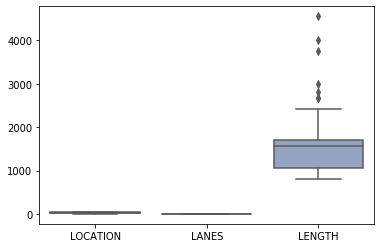

In [89]:
ax = sns.boxplot(data=num_data, orient="v", palette="Set2")

In [119]:
from scipy import stats
numdataz = np.abs(stats.zscore(num_data['LENGTH']))

numdataz

array([5.54673812e-04, 8.12859875e-01, 5.54673812e-04, 8.69567974e-01,
       5.54673812e-04, 8.84894487e-01, 8.69567974e-01, 1.03242312e-01,
       5.54673812e-04, 8.69567974e-01, 5.54673812e-04, 5.63037709e-01,
       5.54673812e-04, 5.54673812e-04, 8.23588434e-01, 8.69567974e-01,
       5.63037709e-01, 8.69567974e-01, 8.69567974e-01, 5.54673812e-04,
       4.94068400e-01, 5.63037709e-01, 5.54673812e-04, 5.54673812e-04,
       5.54673812e-04, 6.39670275e-01, 5.54673812e-04, 7.46955868e-01,
       8.69567974e-01, 5.54673812e-04, 6.22811111e-01, 4.58360543e+00,
       6.85649815e-01, 5.54673812e-04, 8.69567974e-01, 5.54673812e-04,
       3.33140011e-01, 5.54673812e-04, 7.28564052e-01, 5.54673812e-04,
       5.54673812e-04, 1.22556638e+00, 5.54673812e-04, 8.08261921e-01,
       3.72838599e+00, 1.06770330e+00, 6.63083349e-01, 5.63037709e-01,
       6.63083349e-01, 5.54673812e-04, 4.33185650e-01, 4.09772577e-01,
       2.19573467e+00, 2.30452372e-01, 6.33539670e-01, 5.63037709e-01,
      

In [131]:
len_data = num_data['LENGTH']

In [132]:
len_data.head()

0    1567.0
1    1037.0
2    1567.0
3    1000.0
4    1567.0
Name: LENGTH, dtype: float64

In [133]:
len_data = len_data[(len_data < 2067)]

In [134]:
len_data.min()

804.0

In [135]:
len_data.shape

(86,)

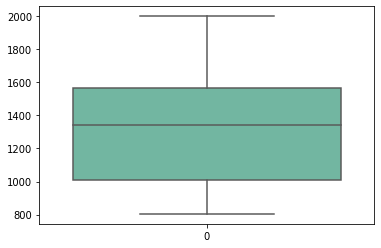

In [136]:
ax = sns.boxplot(data=len_data, orient="v", palette="Set2")

In [142]:
#correlation
data_corr = data.corr(method = 'pearson')

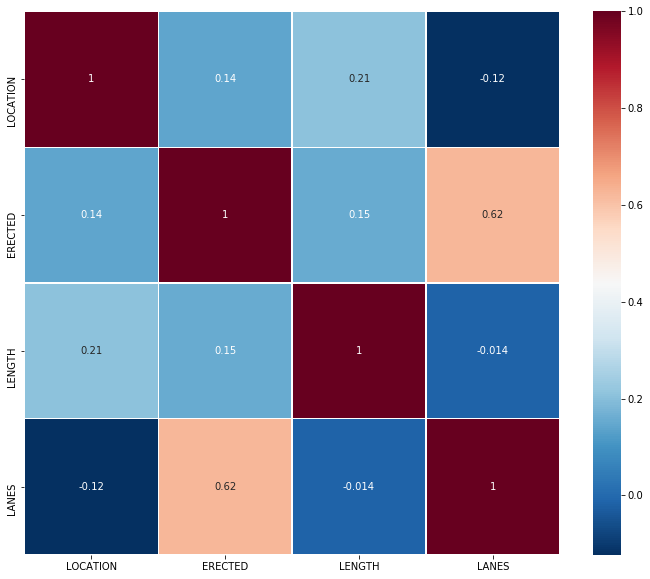

In [143]:
f, ax = plt.subplots(figsize= (12,10))
sns.heatmap(data_corr, ax =ax,
            xticklabels=data_corr.columns,
            yticklabels=data_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

In [145]:
#The ERECTED and LENGTH Feature has the highest correlation with each other and one is dropped

data.drop('LANES',axis=1)

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3.0,1818,HIGHWAY,1567.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25.0,1819,HIGHWAY,1037.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39.0,1829,AQUEDUCT,1567.0,N,THROUGH,WOOD,MEDIUM,S,WOOD
3,E5,A,29.0,1837,HIGHWAY,1000.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23.0,1838,HIGHWAY,1567.0,N,THROUGH,WOOD,MEDIUM,S,WOOD
5,E7,A,27.0,1840,HIGHWAY,990.0,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28.0,1844,AQUEDUCT,1000.0,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3.0,1846,HIGHWAY,1500.0,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39.0,1848,AQUEDUCT,1567.0,N,DECK,WOOD,MEDIUM,S,WOOD
9,E11,A,29.0,1851,HIGHWAY,1000.0,N,THROUGH,WOOD,MEDIUM,S,WOOD


### I will make further changes to the values used for filling the Length - as it is dependent on the SPAN 

Please add corrections and/or feedback to the noteb